# Исследование рынка российского кинопроката
Заказчик этого исследования — Министерство культуры Российской Федерации. Нужно изучить рынок российского кинопроката и выявить текущие тренды. Необходимо уделить внимание фильмам, которые получили государственную поддержку и ответить на вопрос, насколько такие фильмы интересны зрителю.
Источник данных- портал открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

## Открытие файла с данными и изучение общей информации

In [2]:
# #открываем файл
try:
    df = pd.read_csv('mkrf_movies.csv')
except:
    df = pd.read_csv('mkrf_movies.csv')
#при попытке изменения формата столбца 'puNumber' на целочисленный выходит ошибка, так как одна строка в данном столбце содержит текст
#изменим значение в ней на 0
df.loc[df['puNumber'] == "нет", 'puNumber'] = 0
df['puNumber'] = df['puNumber'].astype(int)
df.info()
pd.options.display.float_format = '{:,.1f}'.format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
try:
    df_shows = pd.read_csv('mkrf_shows.csv')
except:
    df_shows = pd.read_csv('mkrf_shows.csv')
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
#объединим датасеты таким образом, чтобы все строки из df вошли в общий датасет
df = df.merge(df_shows, on='puNumber', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В конечный датасет вошли все 3158 строк из датасета df_shows. Проверим корректность объединения- отсортируем датасеты df и df_shows по номеру прокатного удостоверения и выведем первые 10 строк в каждом из них.

In [6]:
df[df['box_office'].isna() == False].sort_values(by='puNumber').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1128,Тайна перевала Дятлова,111000113,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика","2,450.0"
2397,Небесный верблюд,111000115,2015-01-14T12:00:00.000Z,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,"34,000,000.0","49,280,496.0",Министерство культуры,6.7,"детский,семейный","61,040.0"
3136,"Статус: ""Свободен""",111000116,2016-01-13T12:00:00.000Z,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,"20,000,000.0","20,000,000.0","78,686,500.0",Фонд кино,5.8,"комедия,мелодрама","153,030,013.4"
3670,После тебя,111000117,2017-01-10T12:00:00.000Z,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,"7,000,000.0","20,000,000.0","45,483,233.0","Министерство культуры, Фонд кино",6.7,драма,"12,260,956.0"
5693,ЗОМБОЯЩИК (ZОМБОЯЩИК),111000118,2018-01-23T12:00:00.000Z,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.2,комедия,"163,684,057.8"
6607,Пилигрим,111000119,2019-02-14T12:00:00.000Z,Художественный,"ООО ""Чайка Синема""",Россия,А.Баршак,"М.Гуцериев, Е.Север, Т.Стацман",«16+» - для детей старше 16 лет,0.0,"35,000,000.0","115,000,000.0",Министерство культуры,5.3,триллер,"4,293,649.5"
514,Ржевский против Наполеона,111000212,2012-01-12T12:00:00.000Z,Художественный,"ООО ""Территория Кино""",Россия,М.Бальчунас,"ООО ""Квартал Леополис""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.0,комедия,200.0
3060,Городские птички.,111000216,2016-01-15T12:00:00.000Z,Художественный,"ООО ""Каргофильм""",Россия,Ю.Белюсева,А.Готлиб,«16+» - для детей старше 16 лет,0.0,"25,000,000.0","38,461,538.0",Министерство культуры,5.4,"комедия,мелодрама","355,567.0"
883,ОХОТА НА ПРИНЦЕССУ. Часть 2,111000313,2013-01-31T12:00:00.000Z,Художественный,"ООО Киностудия ""Сагиттариус - Д""",Россия,С.Дружинина,С.Дружинина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.1,"драма,история",710.0
1334,Чемпионы.,111000314,2014-01-15T12:00:00.000Z,Художественный,"ООО ""ЕМ Продакшн""",Россия,"А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (...","Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.9,"спорт,драма","1,607,970.0"


In [7]:
df_shows.sort_values(by='puNumber').head(10)

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"
5,111000119,"4,293,649.5"
6,111000212,200.0
7,111000216,"355,567.0"
8,111000313,710.0
9,111000314,"1,607,970.0"


Информация в приведенных строках совпадает, из чего можем сделать вывод, что объединение данных выполнено верно без потери данных.

Для начала изменим название столбца 'puNumber' и приведем его к "змеиному" регистру.

In [8]:
df = df.rename(columns={'puNumber': 'pu_number'})

In [9]:
#изучим данные
df.sample(15)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5001,Кастинг для злодея,111009311,2011-12-07T12:00:00.000Z,Художественный,"ООО ""ГРИНСИТИ""",Россия,"Н.Макарова, В.Воробьев","А.Сафронов, О.Степанцова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,2.8,комедия,"73,416.0"
6663,Громкая связь,111001519,2019-02-04T12:00:00.000Z,Художественный,"ООО ""СИГМА"" по заказу ООО ""МАРС МЕДИА ЭНТЕРТЕЙ...",Россия,А.Черномазов (псевдоним Алексей Нужный),"Р.Дишдишян, Л.Барац, Р.Хаит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,комедия,"524,897,298.2"
4217,Каратэ-пацан,221065810,2010-08-27T12:00:00.000Z,Художественный,"Коламбиа Пикчерз, Чайна Филм Групп, Джерри Вай...",США,Харольд Цварт,"Джерри Вайнтрауб, Дэжеймс Ласситер, Джада Пинк...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"драма,спорт,семейный",NaN
7226,ДАУ. Три дня,126004119,2019-09-16T12:00:00.000Z,Прочие,Феномен Ю Кей ЛТД,Великобритания,Илья Хржановский,Феномен Ю Кей ЛТД,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.1,"драма,мелодрама",NaN
5119,Возвращение Буратино,114000211,2011-08-02T12:00:00.000Z,Анимационный,"ООО Киновидеостудия ""Анимос"", ООО ""Юнайтед Мул...",Россия,Е.Михайлова,Т.Семенов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,2.9,"мультфильм,приключения,семейный",NaN
2808,Закат (2015),111018815,2015-11-02T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир"", Studio Indie Productio...","Россия, Румыния",А.Анненский,"М.Ленских, М.Антонова, Н.Романюк, А.Савельев",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"драма,детектив",NaN
1210,Как по маслу,121026012,2012-10-18T12:00:00.000Z,Художественный,"Майкл Де Лука Продакшнз, Вандалиа Филмз, Вайнш...",США,Джим Филд Смит,"Дженнифер Гарнер, Джулиана Джейнс, Майкл Де Лука",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"драма,комедия",NaN
2653,Песнь моря,124003315,2015-07-31T12:00:00.000Z,Анимационный,"Биг Фарм, Картун Салун, Диджитал Графикс, Ириш...",Ирландия - Дания - Бельгия - Люксембург - Франция,Томм Мур,"Клаус Токсвиг Кьяэр, Томм Мур, Пол Янг",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,"мультфильм,фэнтези,драма","2,522,400.0"
1379,Петр Ильич Чайковский. Лебединое озеро. Постан...,126001913,2013-06-17T12:00:00.000Z,Прочие,Гласс Слиппер Лайв Ивентс,Великобритания,Росс МакГиббон,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,Если твоя девушка - зомби,221042414,2014-09-29T12:00:00.000Z,Художественный,"Эбболайт Продакшнз, Американ Зоутроп, Старстр...",США,Джэфф Баэна,"Элизабет Дестро, Майкл Закин",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.1,"мелодрама,комедия,ужасы",NaN


Далее проверим явные дубликаты.

In [10]:
df.duplicated().sum()

0

В шапке датафрейма видим скрытые дубликаты- фильм "Особо опасен" встречается в срезе из первых 5 элементов три раза с различными номерами прокатного удостоверения и датой премьеры фильма. Проверим дубликаты, обходя столбцы номера прокатного удостоверения. Дату начала проката оставим, так как фильм может выходить в прокат больше одного раза, получая каждый раз сборы в кинотеатре.

In [11]:
(df
   .duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country',
                      'director', 'producer', 'age_restriction','refundable_support', 'nonrefundable_support', 
                      'budget','financing_source', 'ratings', 'genres', 'box_office']) 
   .sum())

5

Проверим, есть ли дубликаты по номеру прокатного удостоверения.

In [12]:
df['pu_number'].value_counts().head()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
Name: pu_number, dtype: int64

Видим два дубликата- в прокатных удостоверениях 221054410 и 221154310. Выведем их на экран.

In [13]:
df[df['pu_number'] == 221154310]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


Здесь оказалось два совершенно разных фильма под одним номером прокатного удостоверения. При поиске по номеру прокатного удостоверения на сайте Министерства культуры видим, что действительно эти два фильма имеют один и тот же номер прокатного удостоверения. Судя по всему, при выдаче прокатного удостоверения произошла ошибка сохранения данных и на один номер записались два фильма, идущие подряд, так как дата выдачи у них одинакова.

In [14]:
df[df['pu_number'] == 221054410]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Здесь также два удостоверения с одинаковыми номерами на два разных фильма, пусть и с очень похожими названиями, выданы в один день. Снова похоже на ошибку сохранения данных.

Видим 5 дубликатов в таблице при исключении столбца с информацией о прокатном удостоверении. 

Изучим столбцы и содержущуюся в них информацию по отдельности. В столбце 'title' содержится название фильма. В нем нет пропущенных значений. Значения могут повторяться как в следствие приведенной выше ошибки внесения данных, так и по той причине, что фильмы могут иметь одинаковые названия. Первая ошибка будет исправлена в следующем разделе. Изучим столбец 'type', содержащий тип фильма. В нем также нет пропусков. Отобразим все уникальные значения данного столбца. 

In [15]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

У художественных и анимационных фильмов встречаются строки с пробелом. Необходимо привести их к одному виду. Рассмотрим столбец, содержащий информацию о студии, выпустившей фильм.

In [16]:
df['film_studio'].nunique()

5490

5490 уникальных значений в столбце. Однако мы видим, что у большинства фильмов выпускающих студий больше одной, они по-разному сочетаются и, как следствие, создают в столбце большое количество уникальных значений. При необходимости оценки фильмов в зависимости от выпускающих киностудий нужно будет создать список, содержащий только названия киностудий. 

Посмотрим на столбец со странами.

In [17]:
df['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

Видна проблема с наличием пробелов в названиях стран, неправильным написанием, различными разделителями- где-то запятая, где-то дефис, разный порядок стран в списке. Здесь нужно будет изменить все разделители на один тип, убрать лишние пробелы. Если останется не слишком много значений, то можно будет поменять порядок стран вручную. 

Рассмотрим столбец 'director'.

In [18]:
df['director'].sample(10)

687                           Детлеф Бук
2437                           И.Ковалев
1194    Бенуа Делепин, Гюстав де Керверн
3146                            М.Шевчук
424                      Фредерик Жарден
3132                       Бора Дагтекин
4704               Д.Карро, В.Абдрашитов
2063                         А.Ибрагимов
3000                           Дэйв Грин
6211                          Эмили Атеф
Name: director, dtype: object

Рассмотрим столбец 'age_restriction'.

In [19]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

Рассмотрим столбцы с возвратным и невозвратным объемом средств господдержки, общим бюджетом фильма и сборами в кинотеатрах.

In [20]:
df.describe()

,pu_number,refundable_support,nonrefundable_support,budget,box_office
count,"7,486.0",332.0,332.0,332.0,"3,158.0"
mean,"135,178,527.6","11,864,457.8","48,980,988.9","127,229,716.7","76,478,696.2"
std,"38,382,177.4","24,916,555.3","59,980,117.9","188,588,333.1","240,353,122.8"
min,0.0,0.0,0.0,0.0,0.0
25%,"112,025,043.0",0.0,"25,000,000.0","42,000,000.0","86,239.0"
50%,"121,015,464.5",0.0,"30,000,000.0","68,649,916.0","2,327,987.5"
75%,"124,003,313.8","15,000,000.0","40,375,000.0","141,985,319.5","23,979,671.0"
max,"231,001,111.0","180,000,000.0","400,000,000.0","2,305,074,303.0","3,073,568,690.8"


Рассмотрим столбец с источником финансирования.

In [21]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Рассмотрим стобец с рейтингом.

In [22]:
df['ratings'].value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
1.2      1
19%      1
1.8      1
1.0      1
1.3      1
Name: ratings, Length: 94, dtype: int64

В основном рейтинг дан по 10-балльной шкале (источник рейтинга- сайт Кинопоиск), но встречается рейтинг в процентах. Нужно будет проверить источник, откуда взяты эти рейтинги и по возможности также привести их к 10-балльной шкале. Проверим столбец с жанрами.

In [23]:
df['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

Здесь снова видим, что жанры указаны через запятую с различным чередованием.

### Вывод
1. В столбце 'title' содержится название фильма, пропущенных значений нет.
2. Название столбца 'puNumber' привели к змеиному регистру ('pu_number'). В самом столбце нет пропусков.  
3. В столбце 'show_start_date' нет пропусков, необходимо изменить тип данных.
4. В столбце 'type' нужно привести все типы к единому образцу- убрать пробелы из художественных и анимационных.
5. В столбце 'film_studio' 18 пропущенных значений. Заполним их значением 'Неизвестно'. В столбце 5490 уникальных значений- фильмы редко снимает одна киностудия, в столбце они перечислены в разном порядке. Необходимо создать список киностудий по отдельности и по нему проанализировать датасет.
6. В столбце 'production_country' 2 пропущенных значения, которые по возможности будут заполнены вручную. Здесь, как и в предыдущем столбце, часто страны чередуются в различном порядке, но также необходимо избавиться от лишних пробелов и привести разделители между странами к единому- в столбце в качестве разделителя австречаются запятая и дефис. Возможно, после этого количество элементов станет меньше и можно будет в ручном режиме поменять порядок стран на единый.
7. В столбце 'director' 9 пропущенных значений, по возможности будут заполнены вручную.
8. В столбце 'producer' 568 значений. Значений слишком много, чтобы заполнять их вручную, но автоматизировать процесс вряд ли получится, поэтому отсутствующие значения заменим значением 'Неизвестно'.
9. В столбце 'age_restriction' нет пропущенных значений. 
10. В столбцах 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source' по 332 значения. Эта информация важна для анализа фильмов с господдержкой, пропуски заполнить не представляется возможным. В первых трех столбцах необходимо заменить тип данных на целочисленный.
11. В столбце 'ratings' пропущено 967 значений. Заполнить пропуски вручную не получится, автоматизировать процесс- тоже.
12. В столбце 'genres' пропущено 976 значений. Заполнить пропуски вручную не получится, автоматизировать процесс- тоже. Здесь жанры чередуются, поэтому в столбце большое количество уникальных значений. По возможности нужно привести к одному формату и отсортировать жанры в алфавитном порядке внутри строки. 
13. В столбце 'box_office' пропущено больше половины значений-  4328. Здесь указаны сборы фильмов, заполнить пропуски не получится, поэтому при анализе придется использовать только эти данные. Возможно, есть корреляция рейтинга фильма и сборов в кинотеатре. Если есть, можно оценить успех фильма одновременно по двум этим столбцам. Необходимо изменить тип данных на целочисленный.
14. В целом в датайфрейме не обнаружено явных дубликатов, но обнаружены неявные- 662 значения, в которых различаются столбцы с прокатным удостоверением, датой начала проката, жанром и сборами в кинотеатрах, однако если смотреть дубликаты только в обход столбца с номером прокатного удостоверения, то число дубликатов сокращается до 5. Эти 5 дубликатов удалим, по остальным будем считать, что фильм повторно выходил в прокат и получал сборы в кинотеатре.

## Предварительная обработка данных

Для начала удалим 5 неявных дубликатов.

In [24]:
df = df.drop_duplicates(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country',
                      'director', 'producer', 'age_restriction','refundable_support', 'nonrefundable_support', 
                      'budget','financing_source', 'ratings', 'genres', 'box_office']).reset_index(drop=True)

Далее изменим тип данных в строке с датой начала проката.

In [25]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df.sample()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2711,Хорошее убийство,121018315,2015-09-07 12:00:00+00:00,Художественный,"Вольтаж Пикчерз, Дан Филмз, Собини Филмз",США,Эндрю Никкол,"Николя Картье, Зев Формен, Марк Эмин",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.1,"триллер,детектив,драма",NaN


Далее уберем пробелы из столбца с типом фильмов.

In [26]:
df['type'] = df['type'].str.strip()
df['type'].value_counts()

Художественный                5906
Анимационный                   828
Прочие                         406
Документальный                 287
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Заполним отсутствующие значения в столбце с киностудиями. Рассмотрим подробнее этот столбец. Для этого создадим список киностудий, содержащихся в столбце.

In [27]:
df['film_studio'] = df['film_studio'].fillna('Неизвестно')
studios = df['film_studio'].tolist()
res = []
for i in studios:
    for j in i.split(','):
        if j not in res:
            res.append(j)
sorted(res)

['',
 ' ',
 '             ОЧУ ДО "Киношкола "Лестница"',
 '        ООО "КОД"',
 '    Катапульт Фильм',
 '  "Баррандов" (ЧССР) при участии "Альянс Фильмопродукцион ГМБХ" (Западный Берлин) "Зесполы фильмове" (ПНР)',
 '  Ma.ja.de Film production Gmbh',
 '  Байришер Рандфанк',
 '  Гольфстрим Пикчерз',
 '  Джейсон Камински',
 '  Ентер Чьен Ет Луп ЭсСиРЛ',
 '  Иллюминейшн Интертейнмент',
 '  Кофинова 5',
 '  Ле Студио Канал',
 '  Мария Хосе Дельгадо',
 '  Медиа Райтс Кэпитал',
 '  Медиа де ля Коммуните Еуропенн',
 '  ОАО "ЦНФ"',
 '  ООО "Арт Пикчерс Студия"',
 '  ООО "Паровоз"',
 '  ООО "Сентрал продакшн интернейшнл груп"',
 '  ООО "Студия Тунбокс"',
 '  Радио Телевизион',
 '  Радио Телевизион Эспаньола',
 '  Уолт Дисней Пикчерз',
 '  ФГУП "Киноконцерн "Мосфильм"',
 '  Цвейтес Дойче Ферншен ',
 '  ЭмЭмСи Индепендент',
 ' "20 СТЕПС ПРОДАКШЕНС"',
 ' "Артемис"',
 ' "Бавария Пикчерс Гмбх"',
 ' "Баррандов"',
 ' "Гринлит"',
 ' "ИКАИК" (Куба)',
 ' "КСТ"',
 ' "Космос-филм" (Франция)',
 ' "Крок" Межд

В столбце с киностудиями огромное количество различных киностудий и такое же количество способов их написания. Привести столбец к единому виду- слишком трудоемкая задача, поэтому данный столбец не будет использован при анализе. При сохранении данных можно рекомендовать вносить данные с автоматизированной проверкой по базе данных, а название студии- на языке оригинала.

Приведем информацию в столбце 'production_country' к единому виду- страны, если их несколько, будут написаны через дефис в алфавитном порядке. Так получится сгруппировать их и оценить, какие страны выпускают фильмов больше всего.

In [28]:
def unific(row):
    countries = str(row['production_country'])
    return countries.replace(' , ', '-').replace(', ', '-').replace(' ,', '-').replace(' - ', '-').replace('- ', '-').replace(' -', '-')
df['production_country'] = df.apply(unific, axis=1)
df['production_country'] = df['production_country'].apply(lambda x: '-'.join(sorted(x.split('-'))))
df['production_country'] = df['production_country'].str.strip()
df['production_country'].sort_values().unique()

array(['-Великобритания-Германия-Канада-США-Швеция', '2019', 'CША', 'nan',
       'Австралия', 'Австралия -Германия-Канада-США-Франция',
       'Австралия-Бельгия-Великобритания-Индия',
       'Австралия-Бразилия-Великобритания-Германия-США-Франция',
       'Австралия-Великобритания',
       'Австралия-Великобритания-Германия-Ирландия-Канада-Куба-США',
       'Австралия-Великобритания-Германия-Канада-США',
       'Австралия-Великобритания-Дания-Ирландия-Канада  -Польша-Франция-Швейцария-Япония',
       'Австралия-Великобритания-Новая Зеландия-США',
       'Австралия-Великобритания-США', 'Австралия-Германия',
       'Австралия-Германия-Индия-Канада-США-Франция',
       'Австралия-Германия-США', 'Австралия-Германия-Финляндия',
       'Австралия-Дания-Канада-Норвегия-США', 'Австралия-Дания-США',
       'Австралия-Индия-США', 'Австралия-Ирландия', 'Австралия-Канада',
       'Австралия-Канада-США', 'Австралия-Колумбия',
       'Австралия-Мексика-США', 'Австралия-США', 'Австралия-США-Турция'

Видим в данном столбце четыре выбивающихся значения- '-Великобритания-Германия-Канада-США-Швеция', 'nan', '2019' и 'США'. Последнее при сортировке попадает в начало. Судя по всему, первой буквой идет английская C вместо русской С. Исправим их вручную- для nan и 2019 найдем страну производства в интернете, в США заменим первую букву, а в последнем- уберем дефис перед первой страной.

In [29]:
df[df['production_country'] == 'nan']
df.loc[df['production_country'] == 'nan', 'production_country'] = 'Россия'
df[df['production_country'] == '2019']
df.loc[df['production_country'] == '2019', 'production_country'] = 'Германия'
df.loc[df['production_country'] == 'CША', 'production_country'] = 'США'
df['production_country'] = df['production_country'].str.lstrip('-')
df['production_country'].sort_values().unique()

array(['Австралия', 'Австралия -Германия-Канада-США-Франция',
       'Австралия-Бельгия-Великобритания-Индия',
       'Австралия-Бразилия-Великобритания-Германия-США-Франция',
       'Австралия-Великобритания',
       'Австралия-Великобритания-Германия-Ирландия-Канада-Куба-США',
       'Австралия-Великобритания-Германия-Канада-США',
       'Австралия-Великобритания-Дания-Ирландия-Канада  -Польша-Франция-Швейцария-Япония',
       'Австралия-Великобритания-Новая Зеландия-США',
       'Австралия-Великобритания-США', 'Австралия-Германия',
       'Австралия-Германия-Индия-Канада-США-Франция',
       'Австралия-Германия-США', 'Австралия-Германия-Финляндия',
       'Австралия-Дания-Канада-Норвегия-США', 'Австралия-Дания-США',
       'Австралия-Индия-США', 'Австралия-Ирландия', 'Австралия-Канада',
       'Австралия-Канада-США', 'Австралия-Колумбия',
       'Австралия-Мексика-США', 'Австралия-США', 'Австралия-США-Турция',
       'Австралия-США-Франция', 'Австралия-Франция', 'Австрия',
       'А

Привели все строки к единому образцу. Так с ними будет проще работать. Теперь сделаем то же самое со столбцом, содержащим информацию о жанре- расположим их в алфавитном порядке.

In [30]:
df['genres'] = df['genres'].fillna('неизвестно')
df['first_genre'] = df['genres'].apply(lambda x: ''.join(x.split(',')[0]))
df['genres'] = df['genres'].apply(lambda x: ','.join(sorted(x.split(','))))
df['first_genre'].value_counts()

драма              1687
неизвестно          975
комедия             696
боевик              617
ужасы               573
мультфильм          537
триллер             521
фантастика          410
мелодрама           383
фэнтези             358
документальный      219
аниме                74
мюзикл               64
детектив             56
приключения          55
военный              46
криминал             39
биография            33
семейный             32
детский              28
история              25
короткометражка      13
концерт              12
спорт                 9
вестерн               7
музыка                7
для взрослых          3
реальное ТВ           1
фильм-нуар            1
Name: first_genre, dtype: int64

После того, как расположили жанры в алфавитном порядке, уникальных значений в столбце осталось всё ещё довольно много. Анализировать такие данные будет тяжело, поэтому ввели доволнительный столбец- 'first_genre', в котором оставили первый жанр из списка- будем считать, что жанры идут в порядке их соответствия, то есть первый жанр будет основным для фильма. Распределение значений выглядит правдоподобно- наибольшее количество фильмов- драмы, комедии и боевики. В следующем разделе попробуем оценить, фильмы какого жанра нравятся зрителям больше всего.

In [31]:
df[df['director'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,first_genre
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,"44,350.0",неизвестно
1733,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,неизвестно
3838,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,неизвестно
4049,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,неизвестно
4295,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,неизвестно
4412,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN,концерт
4438,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Неизвестно,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"комедия,мультфильм",NaN,мультфильм
4920,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,неизвестно
4939,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN,концерт


Режиссеров фильмов, в которых они не указаны, найти в поисковике не удалось, поэтому заполним пропуски значением 'Неизвестно'. Так же поступим с пропусками в столбце 'producer'. В столбце 'financing_source' пропуски заполним значнием 'Без гос.финансирования'. В столбцах с государственным финансированием заполним пропуски нулевыми значениями- будем исходить из предположения, что объем финансирования не указан для фильмов, у которых его не было. Заполним пропуски нулевым значением и исправим тип данных на целочисленный в столбцах, связанных с финансированием фильмов. Перед заполнением пропусков нулевыми значениями проверим столбец 'budget', нет ли в нем фильмов, получивших поддержку, бюджет которых равен нулю.

In [32]:
df.query('budget == 0 and (refundable_support + nonrefundable_support) > 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,first_genre
2051,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1",мелодрама
2056,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0",драма
2470,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4",боевик
2530,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"комедия,фэнтези","67,418,974.8",комедия
2613,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4",мультфильм
2682,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"драма,комедия","1,957,738.5",комедия
2786,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0",0.0,Фонд кино,5.1,"комедия,мелодрама","72,937,783.2",комедия
2872,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,комедия,"15,362,931.4",комедия
3045,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0",0.0,Фонд кино,6.3,"комедия,мелодрама","70,299,052.0",комедия
3563,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0",0.0,Фонд кино,5.6,фантастика,"1,038,321,489.0",фантастика


Обнаружили 17 таких фильмов. Заполним для них бюджет вручную. На Кинопоиске бюджет указывают в рублях, а на Википедии- в долларах. Если бюджет будет указан на Кинопоиске, то заполним сразу в рублях, если только на википедии, то при переводе его в рубли будем брать среднегодовой курс на момент выхода фильма, поэтому при заполнении укажем бюджет в долларах и умножим его на среднегодовой курс в коде.

In [33]:
df.loc[df['pu_number'] == 111023614, 'budget'] = 500000 * 60.96
df.loc[df['pu_number'] == 111000415, 'budget'] = 140000000
df.loc[df['pu_number'] == 111017315, 'budget'] = 115000000
df.loc[df['pu_number'] == 111009615, 'budget'] = 60000000
df.loc[df['pu_number'] == 114001715, 'budget'] = 1000000000
df.loc[df['pu_number'] == 111017115, 'budget'] = 1400000 * 60.96
df.loc[df['pu_number'] == 111004916, 'budget'] = 1300000 * 67.03
df.loc[df['pu_number'] == 111008216, 'budget'] = 110000000
df.loc[df['pu_number'] == 111018116, 'budget'] = 380000000
df.loc[df['pu_number'] == 114001817, 'budget'] = 2400000 * 58.35
df.loc[df['pu_number'] == 111004317, 'budget'] = 50000000
df.loc[df['pu_number'] == 111012117, 'budget'] = 115000000
df.loc[df['pu_number'] == 114001018, 'budget'] = 110000000
df.loc[df['pu_number'] == 114003018, 'budget'] = 116000000
df.loc[df['pu_number'] == 114006518, 'budget'] = 220000000

Для фильмов "Тряпичный союз" и "Большое путешествие" не нашли в открытом доступе информацию о бюджете, что странно. В остальных заполнили бюджет. 

После заполнения некорректных значений в столбце с бюджетом проверим, не превышает ли сумма возвратной и невозвратной поддержки общий бюджет фильма. Для этого выведем на экран те строки, в которых это условие выполняется.

In [34]:
df.query('(refundable_support + nonrefundable_support) > budget')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,first_genre
2682,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"драма,комедия","1,957,738.5",комедия
6818,Большое путешествие,114002419,2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"60,000,000.0","120,000,000.0",0.0,Фонд кино,6.2,"комедия,мультфильм,приключения","147,606,826.5",мультфильм


Так как по фильмам "Тряпичный союз" и "Большое путешествие" не получилось найти информацию о бюджете, их бюджет остался равным нулю при наличии государственной поддержки. Провести полноценный анализ по этим двум фильмам не получится, поэтому удалим их из данных и обновим индексацию.

In [35]:
df = df.query('pu_number not in [111010215, 114002419]').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7479 non-null   object             
 1   pu_number              7479 non-null   int32              
 2   show_start_date        7479 non-null   datetime64[ns, UTC]
 3   type                   7479 non-null   object             
 4   film_studio            7479 non-null   object             
 5   production_country     7479 non-null   object             
 6   director               7470 non-null   object             
 7   producer               6911 non-null   object             
 8   age_restriction        7479 non-null   object             
 9   refundable_support     330 non-null    float64            
 10  nonrefundable_support  330 non-null    float64            
 11  budget                 330 non-null    float64          

In [36]:
df['director'] = df['director'].fillna('Неизвестно')
df['producer'] = df['producer'].fillna('Неизвестно')
df['refundable_support'] = df['refundable_support'].fillna(0).astype('int64')
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')
df['box_office'] = df['box_office'].fillna(0).astype('int64')
df['financing_source'] = df['financing_source'].fillna('Без гос.финансирования')
df.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,first_genre
2073,LIAF-2014. Программа Лондонского международног...,124000215,2015-01-27 12:00:00+00:00,Анимационный,"Свис Рэдио и Телевижн, Бенни Бокс, Сакреблё Пр...",Австралия-Великобритания-Дания-Ирландия-Канада...,"Даэ Джонг, Томек Дуки, Поль Кабон, Нино Кристе...","Павел Бинчуки, Эвелина и Эугениуш Горджежик, Р...",«16+» - для детей старше 16 лет,0,0,0,Без гос.финансирования,NaN,неизвестно,0,неизвестно
4992,Ночь страха,121015211,2011-09-01 12:00:00+00:00,Художественный,"Албукерк Студиос, Дримуоркс Студиос, Гаэта/Роз...",Индия-США,Крэйг Гиллеспи,"Майкл Джей Гаэта, Майкл Де Лука, Элисон Р.Розе...",«16+» - для детей старше 16 лет,0,0,0,Без гос.финансирования,6.5,"комедия,триллер,ужасы",500,ужасы
2158,Kinematic Shorts: Spring. Shorts. Fun. Програм...,121005815,2015-03-25 12:00:00+00:00,Художественный,"Поларис Филм Продакшн энд Финанс, Белив Медиа,...",Великобритания-Республика Кипр-США-Сербия-Фран...,"Тибо Дуран, Даина Пападаки, Пьер Амстудс Рох, ...","Фил Барнс, Кэмпбелл Битон, Павел Вукович, Тать...",«16+» - для детей старше 16 лет,0,0,0,Без гос.финансирования,NaN,неизвестно,0,неизвестно
3008,Робинзон Крузо: Очень обитаемый остров,124001116,2016-04-07 12:00:00+00:00,Анимационный,"Студио Канал, Эн Вэйв Пикчерз, Ю Филм",Бельгия-Франция,"Винсент Кестелут, Бен Стассен","Джина Галло, Мими Мэйнард, Домоник Парис",«6+» - для детей старше 6 лет,0,0,0,Без гос.финансирования,5.9,"комедия,мультфильм,приключения",78745572,мультфильм
903,Берсерк: Золотой век. Фильм II: Битва за Долдрей,124002112,2012-08-23 12:00:00+00:00,Анимационный,Студио 4 С,Япония,Тосиюки Кубоока,"Эйити Камагата, Мицуру Осима, Акира Симада, Эй...",«18+» - запрещено для детей,0,0,0,Без гос.финансирования,7.6,"аниме,мультфильм,фэнтези",0,аниме


Теперь разберемся с рейтингом. Пропуски заполнить не выйдет- их слишком много. Но встречаются значения, которые отличаются от рейтинга на Кинопоиске- в них указаны проценты, а не оценка по десятибалльной шкале. При выводе этих строк видим, что для них не указан рейтинг на Кинопоиске. Заполним пропуски и заменим значения с процентами на 0, чтобы отбросить их при анализе.

In [37]:
df['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [38]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['ratings'] = df['ratings'].fillna(0)
df['ratings'].value_counts()

0.0    995
6.6    311
6.7    308
6.8    261
7.2    251
      ... 
9.2      1
1.2      1
1.9      1
9.1      1
1.3      1
Name: ratings, Length: 81, dtype: int64

In [39]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,first_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,Без гос.финансирования,7.2,"боевик,драма,мелодрама",0,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,0,0,0,Без гос.финансирования,6.6,"военный,драма",0,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Без гос.финансирования,6.8,"боевик,триллер,фантастика",0,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Без гос.финансирования,6.8,"боевик,триллер,фантастика",0,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Без гос.финансирования,6.8,"боевик,триллер,фантастика",0,фантастика


In [40]:
df['production_country'].isna().sum()

0

### Вывод
При предварительной обработке данных внесли в датафрейм следующие изменения:
* исправили формат даты;
* исправили написание типа фильма;
* расположили страны производства фильмов в едином формате- через дефис в алфавитном порядке;
* жанры расположили через запятую в алфавитном порядке и дополнительно ввели столбец, в котором отображается первый жанр из списка начального датафрейма- будем считать этот жанр основным;
* определили, что для фильмов, рейтинг которых указан в процентах, не указан рейтинг на Кинопоиске, поэтому заменили эти значения и заполнили пропуски нулем;
* заполнили пропуски в столбцах. Там, где речь идет о финансировании фильма, заполнили нулевыми значением, а в текстовых столбцах- такими значениями, чтобы отличать их от существующих.

Во всех столбцах, содержащих категориальные значения, встречается одна и та же проблема- данные вносятся от руки в произвольном формате, что приводит к написанию одних и тех же значений разными способами. Какие-то значения, как страна производства или жанр, смогли поправить, но с киностудиями то же сделать не получилось- слишком много вариаций, так как названия иностранных киностудий пишут в транслитерации по своему усмотрению.

## Категоризация данных
В данном разделе добавим столбцы, которые в дальнейшем помогут нам провести более качественный исследовательский анализ данных:
* добавим столбцы 'show_year' и 'show_month', содержащие информацию о годе и месяце начала проката фильма. Год проката позволит оценить динамику выхода фильмов по годам, а месяц позволит проверить одну гипотезу, что прокат фильмов имеет сезонность;
* добавим столбцы 'director_name' и 'director_surname', содержащие информацию об имени и фамилии режиссера. В данных видим, что имя режиссера не всегда пишут полностью, оставляя только инициалы, поэтому будем анализировать только по фамилии;
* добавим столбец 'financial_ratio', в котором посчитаем долю государственной поддержки от общего бюджета фильма. Это позволит нам оценить, влияет ли объем государственной поддержки на популярность фильма.

In [41]:
df['show_year'] = df['show_start_date'].dt.year
df['show_month'] = df['show_start_date'].dt.month
#при нулевом бюджете выдает бесконечное значение доли поддержки, поэтому обойдем нулевые значения через функцию
def financial_ratio(row):
    if row['budget'] > 0:
        return ((row['refundable_support'] + row['nonrefundable_support'])/row['budget'])
    else:
        return 0
df['financial_ratio'] = df.apply(financial_ratio, axis=1).round(1)
display(df['financial_ratio'].value_counts())
df['director'] = df['director'].apply(lambda x: str(x).replace('. ', ' ').replace('.', ' '))
df['director_name'] = df['director'].apply(lambda x: ''.join(x.split(' ')[0]))
def director_surname(row):
    director = row['director']
    main_director = director.split(',')[0]
    if len(main_director.split(' ')) > 1:
        return ''.join(main_director.split(' ')[1:])
    else:
        return row['director_name']
df['director_surname'] = df.apply(director_surname, axis=1)
display(df['director_surname'].value_counts().head(15))

0.0    7150
0.7      89
0.6      88
0.5      44
0.3      39
0.4      36
0.2      20
0.1      10
0.8       2
0.9       1
Name: financial_ratio, dtype: int64

Семёнова     63
Скотт        24
Маршалл      19
Миллер       19
Червяцов     18
Содерберг    17
Смирнов      17
Уайт         16
Смит         15
Коэн         15
Швайгер      14
Ли           14
Аллен        13
Иствуд       13
Гордон       13
Name: director_surname, dtype: int64

### Вывод
В данном разделе добавили столбцы для более качественного исследовательского анализа- изучим динамику выхода фильмов по годам и в течение года по месяцам, режиссеров с наибольшим количеством фильмов и влияние доли государственного финансирования на успешность фильма.

## Исследовательский анализ данных
В данном разделе проведем исследовательский анализ данных. Для начала построим план анализа:
1. Оценка количественных значений, выявление  выбросов и последующая фильтрация данных.
2. Анализ данных по годам и месяцам. Здесь рассмотрим динамику выхода фильмов по годам, оценим их средний рейтинг, наиболее популярные типы и жанры фильмов, изменение возрастного ограничения по годам. Также здесь проверим гипотезу о том, что выход фильмов имеет сезонность. Ожидаем получить результат, что меньше всего фильмов выходит летом и больше всего- зимой, так как летом в городе остается меньше людей и они реже посещают кинотеатры. Также здесь сделаем проверку, меняется ли ситуация с внесением данных о сборах фильмов в кинотеатрах со временем, и если да, то в какой период данные наиболее полные.
3. В выборке из фильмов, имеющих информацию о сборах проведем анализ, как меняются сборы со временем, влияет ли на них возрастное ограничение и сезон показа. Здесь же выделим 10 наиболее кассовых режиссеров по двум показателям- суммарным сборам и средним сборам за каждый фильм. После этого выделим 10 наиболее успешных режиссеров с точки зрения максимального и среднего рейтинга за фильм и сравним результаты.
4. В выборке фильмов, получивших государственную поддержку проанализируем следующие показатели: как менялись средний и общий объем поддержки по годам, кто из режиссеров получает поддержку чаще, какой рейтинг и какие сборы у фильмов, получивших поддержку, в каких жанрах и с какими возрастными ограничениями такие фильмы выходят чаще.

Для начала оценим количественные показатели- бюджет фильмов и кассовые сборы, чтобы выявить аномалии и отфильтровать их при анализе.

In [42]:
df[df['budget'] > 0]['budget'].describe()

count             330.0
mean      136,361,421.0
std       193,576,763.9
min        14,462,464.0
25%        46,168,856.8
50%        75,000,067.5
75%       150,000,000.0
max     2,305,074,303.0
Name: budget, dtype: float64

В выборке фильмов, бюджет которых известен, минимальный бюджет составляет 14 миллионов, средний- 134 миллиона, медианный- 73 миллиона. Такой разрыв между средним и медианой объясняется подозрительно высоким максимальным значением. Выведем отдельно на экран все фильмы, чей бюджет превышает 500 миллионов.

In [43]:
df[df['budget'] > 500000000].transpose()

,2613,2917,3252,3348,5433,5565,5649,6543,7107,7164,7457,7467
title,Савва. Сердце воина,Экипаж .,Время первых (2017),Дуэлянт,Матильда,Легенда о Коловрате,Движение вверх,Т-34,Тайна Печати Дракона,Грех,Союз спасения,Вторжение
pu_number,114001715,111005416,111001317,111015416,111005717,111007617,111011817,111024918,111012819,111014419,111022019,111022519
show_start_date,2015-07-21 12:00:00+00:00,2016-03-21 12:00:00+00:00,2017-02-21 12:00:00+00:00,2016-09-14 12:00:00+00:00,2017-08-17 12:00:00+00:00,2017-11-30 12:00:00+00:00,2017-12-21 12:00:00+00:00,2018-12-21 12:00:00+00:00,2019-09-12 12:00:00+00:00,2019-08-31 12:00:00+00:00,2019-12-26 12:00:00+00:00,2019-12-23 12:00:00+00:00
type,Анимационный,Художественный,Художественный,Художественный,Художественный,Художественный,Художественный,Художественный,Художественный,Художественный,Художественный,Художественный
film_studio,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""","ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""","ООО ""ТаББаК"", ООО ""Студия Третий Рим""","ООО ""Нон-Стоп Продакшн""","ООО ""ТПО ""РОК"", ООО ""Матильда""","ООО ""Продюсерский центр ИВАН""","ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""","ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...","ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",НО Фонд Андрея Кончаловского по поддержке кино...,"ЗАО ""Дирекция кино""","ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011"""
production_country,Россия,Россия,Россия,Россия,Россия,Россия,Россия,Россия,Китай-Россия,Италия-Россия,Россия,Россия
director,М Фадеев,Н Лебедев,Д Киселев,А Мизгирев,А Учитель,И Шурховецкий,А Мегердичев,А Сидоров,О Степченко,А Михалков (псевдоним А Кончаловский),А Кравчук,Ф Бондарчук
producer,А.Чистяков,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...","Т.Бекмамбетов, Е.Миронов","А.Роднянский, С.Мелькумов","А.Учитель, А.Достман, В.Винокур","ООО ""Централ Партнершип"", АО ""Тел...","Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...","А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...","С.Сельянов, А.Петрухин",НО Фонд Андрея Кончаловского по поддержке кино...,"А.Максимов, К.Эрнст","Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский"
age_restriction,«6+» - для детей старше 6 лет,«6+» - для детей старше 6 лет,«6+» - для детей старше 6 лет,«16+» - для детей старше 16 лет,«16+» - для детей старше 16 лет,«12+» - для детей старше 12 лет,«6+» - для детей старше 6 лет,«12+» - для детей старше 12 лет,«6+» - для детей старше 6 лет,«16+» - для детей старше 16 лет,«12+» - для детей старше 12 лет,«12+» - для детей старше 12 лет
refundable_support,60000000,50000000,75000000,150000000,110000000,100000000,0,60000000,180000000,0,100000000,100000000


Видим 11 наиболее масштабных российских фильма последних лет. Сравнивая данные по бюджету в таблице и на сайте Кинопоиск приходим к выводу, что бюджет этих фильмов указан в рублях. Теперь рассмотрим на распределение значений в данном столбце в виде гистограммы.

<AxesSubplot:>

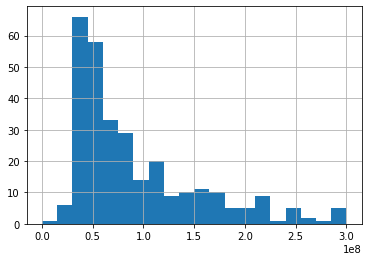

In [44]:
df[df['budget'] > 0]['budget'].hist(bins=20, range=(0,300000000))

Как видно из гистограммы, распределение носит вид, близкий к распределению Пуассона. Подавляющее большинство фильмов имеют сравнительно невысокий бюджет до 60 миллионов.
Далее рассмотрим кассовые сборы фильмов с ненулевыми значениями в столбце.

In [45]:
df[df['box_office'] > 0]['box_office'].describe()

count           3,132.0
mean       77,065,822.9
std       241,248,372.7
min                40.0
25%           100,722.8
50%         2,409,099.0
75%        24,498,636.2
max     3,073,568,690.0
Name: box_office, dtype: float64

Разброс между медианой и средним здесь еще больше- 2 миллиона против 77. Здесь видим подозрительно низкое минимальное значение- всего 40, и очень высокое максимальное значение- более 3 миллиардов. Отобразим фильмы, собравшие кассу более 1 миллиарда, отдельно.

In [46]:
df[df['box_office'] > 1000000000].sort_values(by='box_office', ascending=False).head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,first_genre,show_year,show_month,financial_ratio,director_name,director_surname
7449,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000,...,Фонд кино,6.8,комедия,3073568690,комедия,2019,12,0.4,К,Шипенко
5649,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0,...,Фонд кино,7.5,"драма,спорт",2779686144,спорт,2017,12,0.7,А,Мегердичев
6814,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,0,...,Без гос.финансирования,7.6,"боевик,драма,фантастика",2576613776,фантастика,2019,4,0.0,Джо,Руссо
6543,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000,...,Фонд кино,6.5,"боевик,военный,драма",2271754004,драма,2018,12,0.3,А,Сидоров
3485,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,0,...,Без гос.финансирования,6.6,"боевик,комедия,фэнтези",2118396119,фэнтези,2017,5,0.0,Йоаким,Реннинг


Таких значений 55, поэтому на экран вывели топ-5 кассовых. Здесь видим несоответствие- по России данные вносятся в рублях, по зарубежным странам- в долларах. Оценить, где как вносились данные не представляется возможным, поэтому оценка будет производиться по абсолютным суммам, приведенным в таблице. При внесении данных необходимо разработать алгоритм указания сборов- либо всё в долларах, либо всё в рублях. Теперь рассмотрим самые низкие значения.

In [47]:
df[df['box_office'] > 0].sort_values(by='box_office').head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,first_genre,show_year,show_month,financial_ratio,director_name,director_surname
151,Жестокий романс,111006013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э Рязанов,Неизвестно,«12+» - для детей старше 12 лет,0,...,Без гос.финансирования,8.1,"драма,история,мелодрама",40,драма,2013,10,0.0,Э,Рязанов
2272,Каменный цветок.,111016714,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А Птушко,Неизвестно,«0+» - для любой зрительской аудитории,0,...,Без гос.финансирования,7.1,"драма,мелодрама,фэнтези",50,фэнтези,2014,12,0.0,А,Птушко
3914,22 пули: Бессмертный,121006410,2010-04-01 12:00:00+00:00,Художественный,Еуроп Корпорейшн,Франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+» - для детей старше 16 лет,0,...,Без гос.финансирования,7.1,"боевик,драма,криминал",75,боевик,2010,4,0.0,Ришар,Бери
1180,Астерикс и Обеликс в Британии 3D,121025012,2012-10-05 12:00:00+00:00,Художественный,"Уайлд Банч, Фиделите Фильм, Филм Кайрос, Синет...",Венгрия-Испания-Италия-Франция,Лоран Тирар,"Оливье Делбоск, Марк Миссонье",«6+» - для детей старше 6 лет,0,...,Без гос.финансирования,5.6,"комедия,приключения,семейный",80,комедия,2012,10,0.0,Лоран,Тирар
164,За спичками,111006113,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", ""СУОМИ-ФИЛЬМ""",СССР-Финляндия,"Л Гайдай, Р Орко",Неизвестно,«12+» - для детей старше 12 лет,0,...,Без гос.финансирования,7.5,"история,комедия,приключения",100,комедия,2013,10,0.0,Л,Гайдай
4059,Ловец ветра,111009310,2010-10-21 12:00:00+00:00,Художественный,"ГУП РБ Киностудия ""Башкортостан""",Россия,А Юмагулов,А.Юнусов,«16+» - для детей старше 16 лет,0,...,Без гос.финансирования,7.5,"драма,комедия",100,драма,2010,10,0.0,А,Юмагулов
211,Одиноким предоставляется общежитие,111018614,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С Самсонов,Неизвестно,«12+» - для детей старше 12 лет,0,...,Без гос.финансирования,7.8,"комедия,мелодрама",100,мелодрама,2014,12,0.0,С,Самсонов
1497,Лучшие дни впереди,121023413,2013-09-03 12:00:00+00:00,Художественный,"Ле Фильм дю Киоск, 27.11 Продюксьон, Директ си...",Франция,Марион Верну,"Франсуа Краус, Дени Пино-Валенсьенн",«16+» - для детей старше 16 лет,0,...,Без гос.финансирования,6.6,"драма,комедия",100,драма,2013,9,0.0,Марион,Верну
351,Волшебное приключение,124000905,2015-01-18 12:00:00+00:00,Анимационный,"Экшион Филмз, Патэ Синема, Болексбразерс",Великобритания-Франция,Дэйв Бортвик,"Клауди Горский, Энди Лэйтон, Лаурен Родон, Пас...",«0+» - для любой зрительской аудитории,0,...,Без гос.финансирования,5.7,"комедия,мультфильм,фэнтези",100,мультфильм,2015,1,0.0,Дэйв,Бортвик
1269,Обещание /По произведению Стефана Цвейга/,121009914,2014-05-19 12:00:00+00:00,Художественный,"Фиделите Фильм, Уалд Банч, Скоуп Пикчерз, Оран...",Бельгия-Франция,Патрис Леконт,"Оливье Дебоск, Кристин де Жекель, Марк Миссонье",«18+» - запрещено для детей,0,...,Без гос.финансирования,7.1,"боевик,драма,приключения",100,боевик,2014,5,0.0,Патрис,Леконт


Здесь видим, что в список попали как фильмы производства СССР, так и современные иностранные фильмы. Судя по всему, здесь снова ошибка внесения данных- либо где-то потерялись нули, либо при переносе данных изменяется всё число. Посчитаем количество фильмов, сборы которых меньше 1000.

In [48]:
print(f"Отфильтруем {(df.query('0 < box_office < 1000')['title'].count())} строк")
print(f"Количество отфильтрованных данных составит {(df.query('0 < box_office < 1000')['title'].count() / df.query('0 < box_office')['title'].count()) : .1%}")


Отфильтруем 207 строк
Количество отфильтрованных данных составит  6.6%


In [49]:
df_filt = df.query('box_office > 1000').reset_index(drop=True)
df_filt.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,first_genre,show_year,show_month,financial_ratio,director_name,director_surname
0,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В Меньшов,Неизвестно,«12+» - для детей старше 12 лет,0,...,Без гос.финансирования,8.3,"комедия,мелодрама",2700,мелодрама,2013,10,0.0,В,Меньшов
1,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И Бабич,Неизвестно,«6+» - для детей старше 6 лет,0,...,Без гос.финансирования,8.1,драма,1165,драма,2013,10,0.0,И,Бабич
2,Андрей Рублев.,111029814,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А Тарковский,Неизвестно,«12+» - для детей старше 12 лет,0,...,Без гос.финансирования,8.2,"биография,драма,история",22660,драма,2014,12,0.0,А,Тарковский
3,Асса,111005815,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С Соловьев,Неизвестно,«16+» - для детей старше 16 лет,0,...,Без гос.финансирования,6.0,"боевик,фэнтези",84720,фэнтези,2015,4,0.0,С,Соловьев
4,Айболит - 66,111010513,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ролан Быков,Неизвестно,«0+» - для любой зрительской аудитории,0,...,Без гос.финансирования,7.1,"детский,комедия,мюзикл",1795,мюзикл,2013,12,0.0,Ролан,Быков


Далее проведем исследовательский анализ данных. Сначала в общем датафрейме рассмотрим, сколько прокатных удостоверений выдается каждый год.

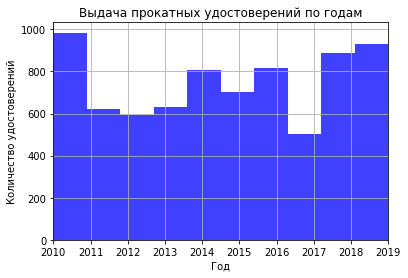

In [50]:
plt.hist(df['show_year'], 10, facecolor='b', alpha=0.75)
plt.xlabel('Год')
plt.ylabel('Количество удостоверений')
plt.title('Выдача прокатных удостоверений по годам')
plt.xlim(2010, 2019)
plt.grid(True)
plt.show()

Здесь видим, что в 2010 году выдано больше всего прокатных удостоверений. При анализе заметили, что год выдачи прокатного удостоверения часто не совпадает с годом выпуска фильма. Здесь стоит заметить, что в 2010 году был образован первый онлайн-кинотеатр в России- ivi. Скорее всего, выдача прокатных удостоверений на большое количество фильмов именно в 2010 году связана с данным событием, так как именно прокатное удостоверение дает право показа фильма на территории Российской Федерации, а онлайн кинотеатр необходимо было наполнять не только новыми, но и старыми фильмами. Также мог наложиться эффект экономического кризиса 2008 года- выпуск части фильмов могли перенести на 2009 и 2010 годы.
Проверим, как данные о сборах вносятся в базу по годам.

<AxesSubplot:title={'center':'Доля фильмов с известными данными о прокате'}, xlabel='show_year'>

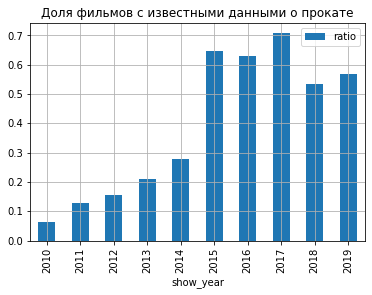

In [51]:
df_box_ratio = df.pivot_table(index='show_year', values='box_office', aggfunc='count')
df_is_box = df_filt.pivot_table(index='show_year', values='box_office', aggfunc='count')
df_box_ratio = df_box_ratio.merge(df_is_box, on='show_year', how='outer')
df_box_ratio.columns = ['count', 'is_box']
df_box_ratio['ratio'] = df_box_ratio['is_box'] / df_box_ratio['count']
df_box_ratio.plot(y='ratio', kind='bar', grid=True, title='Доля фильмов с известными данными о прокате')

Из графика видно, что на постоянной основе данные начали вносить только с 2015 года. В среднем данные вносятся примерно по 60% фильмов. Здесь надо отметить, что внесенные данные считали по отфильтрованному датафрейму- без аномально низких кассовых сборов. Далее оценим, как средние и медианные кассовые сборы меняются по годам в отфильтрованном датафрейме.

<AxesSubplot:title={'center':'Суммарная'}, xlabel='show_year'>

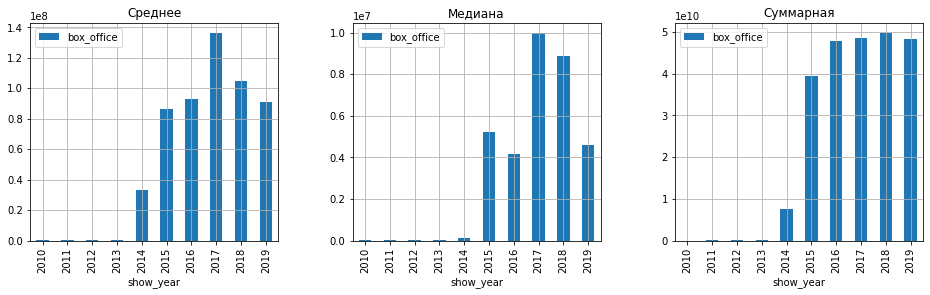

In [52]:
grid = plt.GridSpec(1, 3, wspace=0.3)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[0, 2])
df_filt.pivot_table(index='show_year', values='box_office', aggfunc='mean').plot(kind='bar', figsize=(16,4), title='Среднее', grid=True, ax=ax1)
df_filt.pivot_table(index='show_year', values='box_office', aggfunc='median').plot(kind='bar', figsize=(16,4), title='Медиана', grid=True, ax=ax2)
df_filt.pivot_table(index='show_year', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(16,4), title='Суммарная', grid=True, ax=ax3)

Отсюда видим, что при фильтрации полностью убрали данные с 2010 по 2013 год. Следовательно, данные в этот период вносились не только реже, но и некорректно. По тенденциям видим, что и среднее и медианное значение кассовых сборов максимальное в 2017 году, а суммарные сборы с 2016 по 2019 год практически не меняются и составляют чуть меньше 50 миллиардов. Интересно заметить, что именно в 2017 году фильмов выходило меньше, чем обычно. 

Сгруппируем данные по возрастному цензу и циклом построим графики средних кассовых сборов в возрастных категориях.

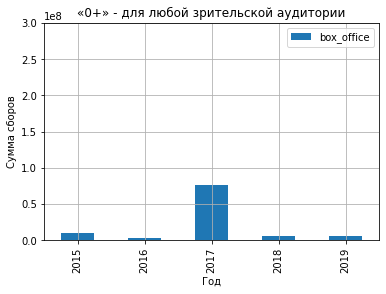

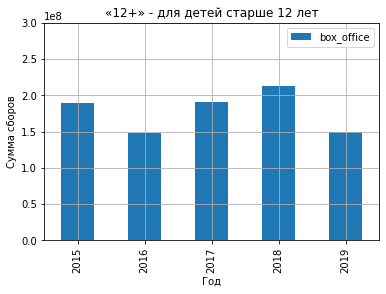

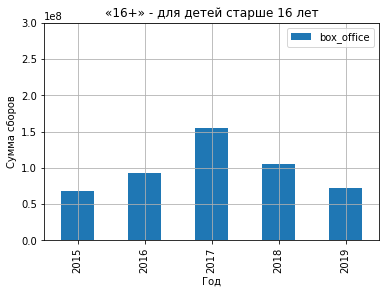

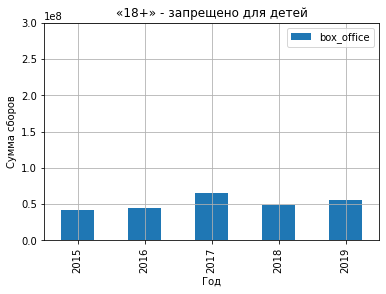

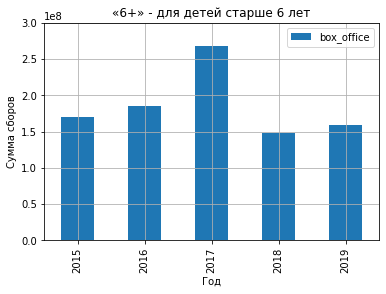

In [53]:
for name, grouped_data in df_filt.loc[df_filt['show_year'] > 2014].groupby('age_restriction'):
    grouped_data.pivot_table(index='show_year', values='box_office', aggfunc='mean').plot(kind='bar', ylim=(0, 300000000), title=name, grid=True)
    plt.xlabel('Год')
    plt.ylabel('Сумма сборов')
    plt.show()

Почти во всех случаях наибольшие сборы наблюдаются в 2017 году, кроме фильмов для детей старше 12 лет. Наиболее явно это выражено в категории "0+"- там средние кассовые сборы за 2017 год в 10 раз больше, чем в остальное время. В категориях "6+", "16+" и "18+" видна одна и та же тенденция- повышение кассовых сборов к 2017 году и снижение после него. Наибольшие средние сборы видим в категории "6+", наименьшие- "18+". Это можно объяснить тем, что дети идут в кинотеатр в сопровождении родителей, поэтому среднее количество билетов на один фильм будет выше, чем на фильм с жестким возрастным ограничением.
Отдельно посмотрим, какие фильмы вышли в 2017 году в категории "0+", чтобы понять, откуда такой взрывной рост.
Попытаемся понять, почему в 2017 году при меньшем количестве фильмов наибольшая средняя касса. 

In [54]:
(df_filt
   .query('show_year == 2017 and age_restriction == "«0+» - для любой зрительской аудитории"')
   .sort_values(by='box_office', ascending=False))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,first_genre,show_year,show_month,financial_ratio,director_name,director_surname
1516,Урфин Джюс и его деревянные солдаты,114000817,2017-04-06 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д Шмидт, Ф Дмитриев, В Торопчин","С.Сельянов, А.Боярский",«0+» - для любой зрительской аудитории,0,...,Фонд кино,5.7,"детский,мультфильм,приключения",206478186,мультфильм,2017,4,0.2,Д,Шмидт
1861,"Колобанга. Привет, Интернет!",114002817,2017-11-30 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,"А Романец, В Марченко",А.Ревва,«0+» - для любой зрительской аудитории,0,...,Без гос.финансирования,4.9,"детский,мультфильм",22178956,мультфильм,2017,11,0.0,А,Романец
1351,Маша и медведь. Новые истории,114001417,2017-05-25 12:00:00+00:00,Анимационный,"ООО ""Маша и Медведь""",Кипр-Россия,"Г Орлов, А Беляев, Н Мальгина, В Байрамгулов","Д.Ловейко, О.Кузовков, М.Ратина",«0+» - для любой зрительской аудитории,0,...,Без гос.финансирования,0.0,неизвестно,941788,неизвестно,2017,5,0.0,Г,Орлов


Оказалось, что в 2017 году данные по сборам внесены всего по 3 фильмам в данной категории, у одного из которых сборы больше 200 миллионов. Поэтому среднее за 2017 год получается завышенным по сравнению с другими годами. Построим средние кассовые сборы по типам фильмов в зависимости от года.

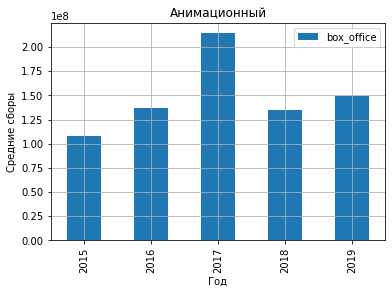

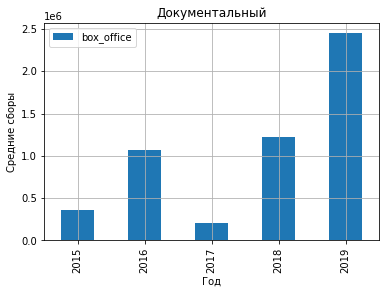

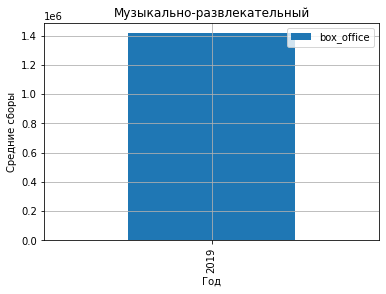

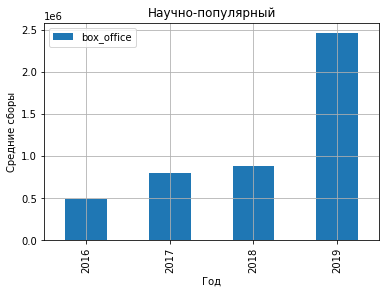

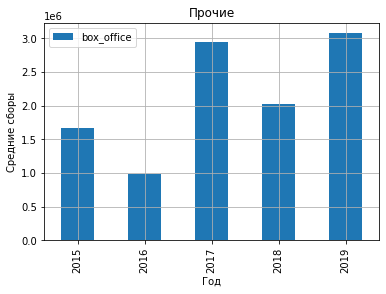

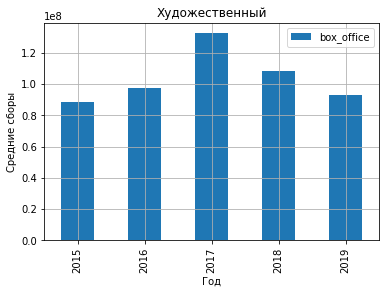

In [55]:
for name, grouped_data in df_filt.loc[df_filt['show_year'] > 2014].groupby('type'):
    grouped_data.pivot_table(index='show_year', values='box_office', aggfunc='mean').plot(kind='bar', title=name, grid=True)
    plt.xlabel('Год')
    plt.ylabel('Средние сборы')
    plt.show()

Наибольшая средняя касса у художественных и анимационных фильмов- в 2017 году. Средние сборы анимационных почти в 2 раза больше, чем у художественных. Причем у анимационных, как и у фильмов "0+", наблюдается взрывной рост.
Оценим изменение среднего рейтинга фильма по годам.

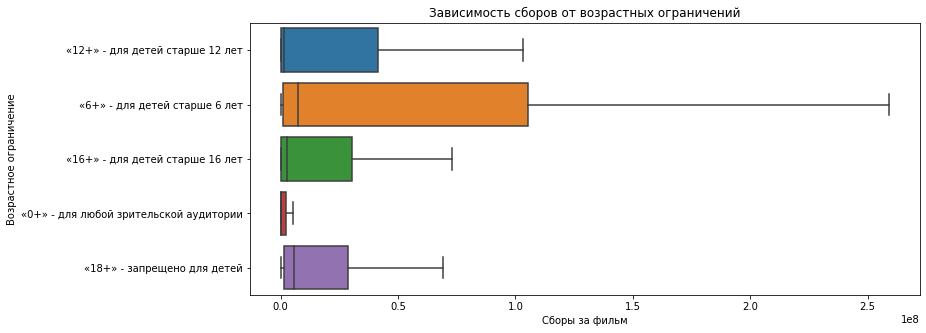

In [56]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.boxplot(x='box_office', y='age_restriction', data=df_filt, showfliers=False)
plt.title('Зависимость сборов от возрастных ограничений')
plt.xlabel('Сборы за фильм')
plt.ylabel('Возрастное ограничение')
plt.show()
# df_filt.boxplot(column='box_office', by='age_restriction', showfliers=False, vert=False)

Text(0, 0.5, 'Средний рейтинг фильма')

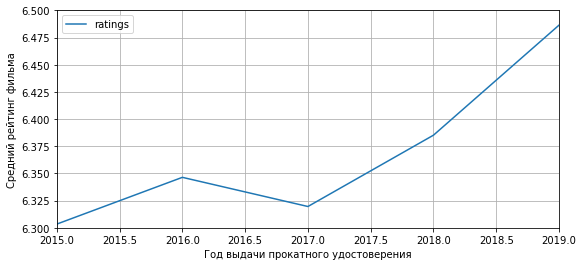

In [57]:
(df
   .query('ratings > 0')
   .pivot_table(index='show_year', values='ratings', aggfunc='mean')
   .plot(grid=True, xlim=(2015, 2019), ylim=(6.3, 6.5), figsize=(9, 4)))
plt.xlabel('Год выдачи прокатного удостоверения')
plt.ylabel('Средний рейтинг фильма')

Так как данных с 2010 по 2014 год мало, построили зависимость среднего рейтинга фильма по годам с 2015 по 2019 год. Видим, что средний рейтинг с каждым годом незначительно повышается.

Далее рассмотрим динамику по месяцам. Здесь ожидаем увидеть, что фильмы в течение года выходят неравномерно и сборы по ним зависят от месяца показа.

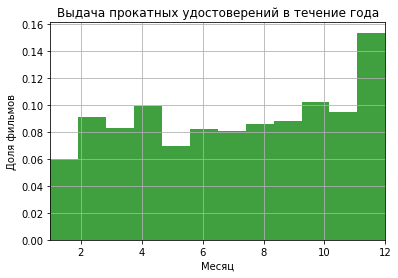

In [58]:
plt.hist(df['show_month'], 12, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Месяц')
plt.ylabel('Доля фильмов')
plt.title('Выдача прокатных удостоверений в течение года')
plt.xlim(1, 12)
plt.grid(True)
plt.show()

Здесь видно, что прокатчики стараются выпустить фильм в декабре- к новогодним каникулам. Таких фильмов почти 16%- около 1/6. Это позволит им заработать больше. При этом в январе наблюдается резкое снижение, небольшой скачок в апреле, который можно объяснить близостью к майским праздникам, снижение в мае и постепенное повышение с июня по ноябрь. Оценим, насколько сезонность влияет на кассовые сборы. В сводной таблице посчитаем средние кассовые сборы для каждого месяца и построим график.

<AxesSubplot:xlabel='show_month'>

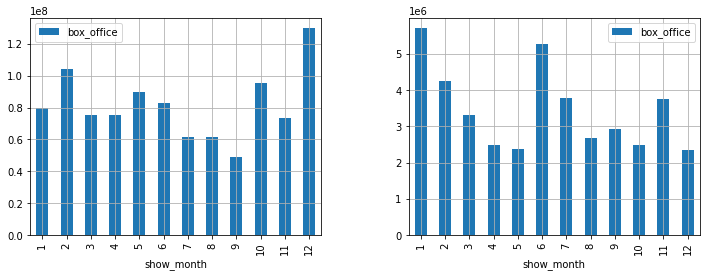

In [59]:
grid = plt.GridSpec(1, 2, wspace=0.3)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
df_filt.pivot_table(index='show_month', values='box_office', aggfunc='mean').plot(kind='bar', figsize=(12,4), ax=ax1, grid=True)
df_filt.pivot_table(index='show_month', values='box_office', aggfunc='median').plot(kind='bar', figsize=(12,4), ax=ax2, grid=True)


Фильм, вышедший в декабре в среднем заработает в 2,5 раза больше, чем фильм, вышедший в сентябре. Действительно, сезон выхода фильма имеет большое влияние на его кассовые сборы. Однако, это справедливо в отношении блокбастеров- именно их кассовые сборы настолько увеличивают среднее значение по отношению к медиане. Распределение медианного значения носит иной характер- скачки в январе, июне и ноябре и плавное снижение.

Далее выделим топ-10 режиссеров по следующим показателям- суммарные сборы в кинотеатрах, средние сборы в кинотеатрах, средний ретинг и максимальный рейтинг.

In [60]:
top10_box_max = (df_filt
                       .pivot_table(index='director_surname', values='box_office', aggfunc='sum')
                       .sort_values(by='box_office', ascending=False) 
                       .head(10))
top10_box_max

,box_office
director_surname,
Руссо,5408122553
Шипенко,4207963320
Йейтс,3451439971
Рено,3450524575
Ван,3129857298
Балда,3036973282
Мегердичев,2779693248
Миллер,2746455045
Куликов,2735914907


In [61]:
top10_box_mean = (df_filt
                       .pivot_table(index='director_surname', values='box_office', aggfunc='mean')
                       .sort_values(by='box_office', ascending=False) 
                       .head(10))
top10_box_mean

,box_office
director_surname,
Реннинг,"2,118,396,119.0"
Флейшер,"1,913,257,923.0"
Эйр,"1,570,380,294.0"
Балда,"1,518,486,641.0"
Трофим,"1,445,731,797.0"
Мегердичев,"1,389,846,624.0"
Руссо,"1,352,030,638.2"
Касдан,"1,246,587,858.0"
Треворроу,"1,211,158,990.0"


In [62]:
top10_rating_max = (df
                       .query('ratings > 0')
                       .pivot_table(index='director_surname', values='ratings', aggfunc='max')
                       .sort_values(by='ratings', ascending=False) 
                       .head(10))
top10_rating_max

,ratings
director_surname,
Аксененко,9.2
Дарабонт,9.1
Мошкова,9.0
Земекис,8.9
Жомболай,8.8
Панков,8.8
Гайдай,8.8
Минкофф,8.8
Фавро,8.8


In [63]:
top10_rating_mean = (df
                       .query('ratings > 0')
                       .pivot_table(index='director_surname', values='ratings', aggfunc='mean')
                       .sort_values(by='ratings', ascending=False) 
                       .head(10))
top10_rating_mean

,ratings
director_surname,
Мошкова,9.0
Панков,8.8
Жомболай,8.8
Аскем,8.7
Гарифуллин,8.7
Ананд,8.6
Свиммер,8.6
Ян,8.6
Каррутерс,8.6


Как видим, списки режиссеров по сборам и по рейтингам не совпадают ни в одной фамилии. Таким образом, можем сделать вывод, что сборы фильма не зависят от его рейтинга. Однако необходимо проверить, действительно ли это так. Построим диаграммы размаха для сборов в кинотеатрах в зависимости от округленного рейтинга фильма.

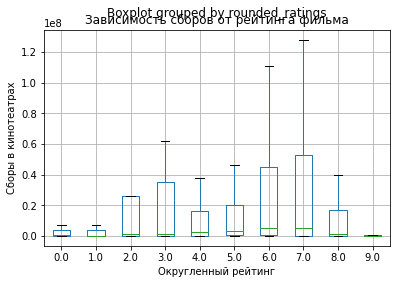

In [68]:
df_filt['rounded_ratings'] = df_filt['ratings'].round()
df_filt.boxplot(column='box_office', by='rounded_ratings', showfliers=False, vert=True)
plt.xlabel('Округленный рейтинг')
plt.ylabel('Сборы в кинотеатрах')
plt.title('Зависимость сборов от рейтинга фильма')
plt.show()

Здесь видим, что медиана сборов растет в интервале рейтинга от 3 до 7, после чего резко падает. При этом верхний квартиль и верхняя граница растут в интервале рейтинга от 4 до 7. Фильмы с рейтингом 8 и 9 показывают меньшие сборы. Но здесь необходимо понять, как много таких фильмов.

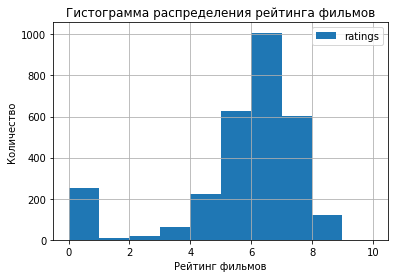

In [70]:
df_filt.plot(y='ratings', kind='hist', range=(0,10), grid=True)
plt.xlabel('Рейтинг фильмов')
plt.ylabel('Количество')
plt.title('Гистограмма распределения рейтинга фильмов')
plt.show()

Подавляющее большинство фильмов имеют рейтинг от 5 до 8. Фильмов с другим рейтингом настолько мало, что нельзя утвреждать однозначно о влиянии рейтинга на сборы фильма.

Теперь определим, насколько наличие государственного финансирования влияет на успешность фильма. Для начала посмотрим долю поддержки от всего бюджета фильма.

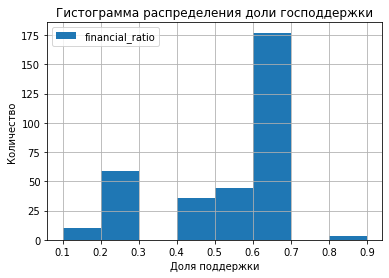

In [72]:
df.query('financial_ratio >0').plot(y='financial_ratio', kind='hist', bins=8, grid=True)
plt.xlabel('Доля поддержки')
plt.ylabel('Количество')
plt.title('Гистограмма распределения доли господдержки')
plt.show()

Чаще всего государственная поддержка от Фонда кино и Министерства культуры составляет более половины бюджета фильма, но не превышает 70%. В документах, выложенных на сайте Фонда кино, указано, что 70%- это максимально возможный объем поддержки. Существуют редкие фильмы с поддержкой выше 70%. Скорее всего, они были сняты до введения данного ограничения. Построим изменение средней доли поддержки по годам. 

Text(0, 0.5, 'Доля господдержки в бюджете')

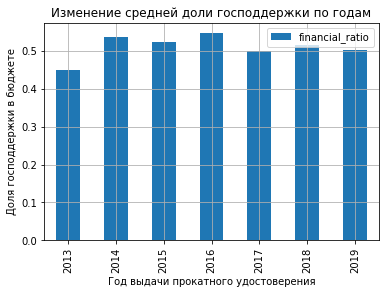

In [73]:
df.query('financial_ratio >0').pivot_table(index='show_year', values='financial_ratio', aggfunc='mean').plot(kind='bar', grid=True)
plt.title('Изменение средней доли господдержки по годам')
plt.xlabel('Год выдачи прокатного удостоверения')
plt.ylabel('Доля господдержки в бюджете')

Доля поддержки остается неизменной и в среднем составляет около половины бюджета фильма. Теперь определим, как изменялся объем поддержки фильмов по годам.

Text(0, 0.5, 'Суммарная поддержка')

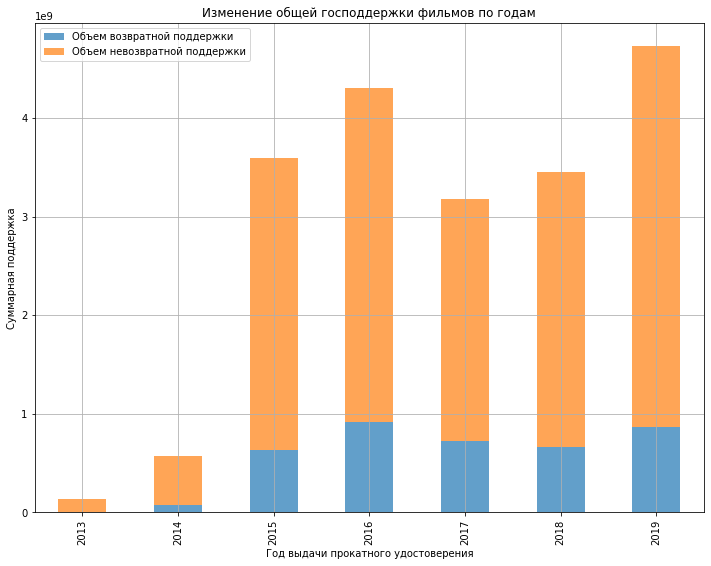

In [74]:
df_sum_support = (df
                .query('financial_ratio > 0')
                .pivot_table(index='show_year', values = ['refundable_support', 'nonrefundable_support'], aggfunc='sum')
             )
(df_sum_support
    .plot(
    kind='bar',
    y=['refundable_support', 'nonrefundable_support'],
    linewidth=5,
    alpha=0.7,
    label=['Объем возвратной поддержки', 'Объем невозвратной поддержки'],
    figsize=(12, 9),
    stacked=True,
    grid=True
))
plt.title('Изменение общей господдержки фильмов по годам')
plt.xlabel('Год выдачи прокатного удостоверения')
plt.ylabel('Суммарная поддержка')

Господдержка фильмов постоянно росла с 2013 по 2016 год и упала на 20% в 2017 году, после чего снова стала расти и достигла маскимума к 2019 году. Стоит отметить, что объем невозвратной помощи сильно превосходит возвратные средства. Определим, менялся ли по годам средний объем поддержки.

Text(0, 0.5, 'Средний объем поддержки')

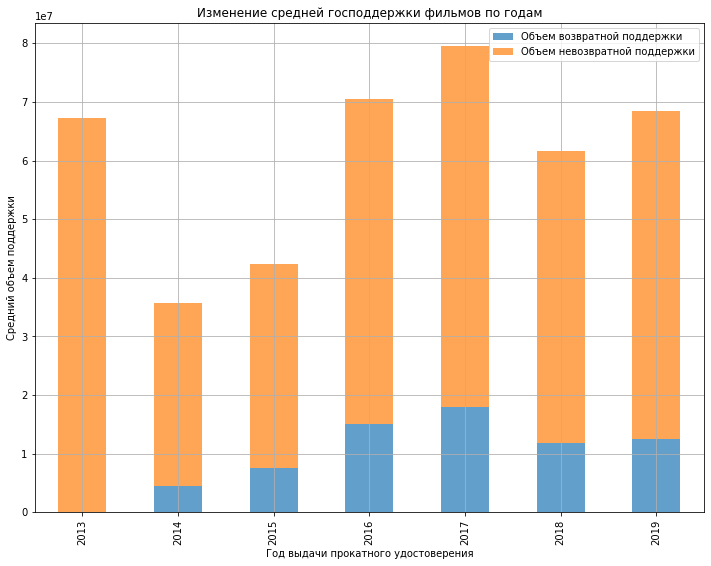

In [75]:
df_mean_support = (df
                .query('financial_ratio > 0')
                .pivot_table(index='show_year', values = ['refundable_support', 'nonrefundable_support'], aggfunc='mean')
             )
(df_mean_support
    .plot(
    kind='bar',
    y=['refundable_support', 'nonrefundable_support'],
    linewidth=5,
    alpha=0.7,
    label=['Объем возвратной поддержки', 'Объем невозвратной поддержки'],
    figsize=(12, 9),
    stacked=True,
    grid=True
))
plt.title('Изменение средней господдержки фильмов по годам')
plt.xlabel('Год выдачи прокатного удостоверения')
plt.ylabel('Средний объем поддержки')

Теперь вычислим, как много из этих фильмов окупаются в кинотеатрах.

In [76]:
df_supported = df.query('financial_ratio > 0').reset_index(drop=True)
df_supported['is_pay'] = ((df_supported['refundable_support'] + df_supported['nonrefundable_support']) < df_supported['box_office'])
df_supported['is_pay'].mean()

0.3556231003039514

Только треть фильмов окупается в кинотеатрах. Посмотрим рейтинги таких фильмов.

In [77]:
df_supported.query('ratings > 0').pivot_table(index='is_pay', values='ratings', aggfunc='mean')

,ratings
is_pay,
False,6.0
True,6.1


Рейтинги окупающихся и не окупающихся фильмов почти не отличаются. Рассмотрим, в каких жанрах и с каким возрастным ограничением чаще всего снимают фильмы с поддержкой.

In [78]:
df_supported['first_genre'].value_counts()

драма          93
комедия        73
мультфильм     30
неизвестно     16
мелодрама      15
триллер        15
фэнтези        11
фантастика     11
ужасы          10
военный         9
семейный        7
приключения     6
боевик          6
детектив        5
детский         4
история         4
мюзикл          4
спорт           3
биография       3
криминал        3
реальное ТВ     1
Name: first_genre, dtype: int64

In [79]:
df_supported['all_support'] = df_supported['refundable_support'] + df_supported['nonrefundable_support']
df_supported_genres = df_supported.pivot_table(index='first_genre', values='all_support', aggfunc='sum')
df_supported_genres.sort_values(by='all_support', ascending=False)

,all_support
first_genre,
драма,5314406632
комедия,3159282945
мультфильм,2281520000
фантастика,1406000000
фэнтези,1032900000
история,1020000000
триллер,769645285
приключения,690000000
неизвестно,688969465


In [80]:
df_supported['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           125
«12+» - для детей старше 12 лет           105
«6+» - для детей старше 6 лет              64
«18+» - запрещено для детей                27
«0+» - для любой зрительской аудитории      8
Name: age_restriction, dtype: int64

Далее определим, кто из режиссеров получает государственную подержку больше всех.

In [81]:
df_directors = df_supported.pivot_table(index='director_surname', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')
df_directors['all_support'] = df_directors['refundable_support'] + df_directors['nonrefundable_support']
df_directors.sort_values(by='all_support', ascending=False).head(10)

,nonrefundable_support,refundable_support,all_support
director_surname,,,
Хомерики,540000000,120000000,660000000
ФБондарчук,400000000,100000000,500000000
Кравчук,400000000,100000000,500000000
Давлетьяров,394847945,65000000,459847945
Мизгирев,300000000,150000000,450000000
Лебедев,392104482,50000000,442104482
Мегердичев,400000000,0,400000000
Дьяченко,180000000,171000000,351000000
Киселев,225000000,125000000,350000000


### Выводы
По результатам исследовательського анализа можно сделать следующие выводы:
1. Почти во всех столбцах, содержащих количественные данные, наблюдается проблема с внесением данных- в столбцах с финансами часть данных внесена в рублях, часть- в иностранной валюте, где-то данные вносятся некорректно и значения являются слишком низкими, чтобы быть правдоподобными. Видно, что систематично данные вносятся, начиная с 2015 года, при этом их объем не превышает 60% фильмов.
2. В интервале с 2010 по 2019 год наибольшее количество фильмов вышло в 2010 году. Возможно, это связано с экономическим кризисом 2008 года и приостановкой работы над фильмами. Наименьшее количество фильмов вышло в 2017 году, однако в этом же году фильмы являются наиболее кассовыми по сравнению с остальными. Это объясняется тем, что в 2017 году резко выросло производство художественных и анимационных фильмов.
3. Более кассовыми являются художественные и анимационные фильмы с мягкими возрастными ограничениями. Больше всего денег собирают фильмы категорий "0+" и "6+". На эти фильмы чаще всего дети идут в сопровождении родителей, что увеличивает количество билетов, продаваемых в кино. Наименьшие сборы- у фильмов "18+". На общие сборы влияет и сезон выхода фильма- фильм, вышедший зимой в среднем соберет кассу больше, чем фильм, вышедший летом. Рейтинг фильма не оказывает особого влияния на его кассовые сборы.
4. При получении государственной поддержки производители фильма стараются получить максимальный ее объем- 70% от общего бюджета фильма. Большая часть из этих денег является невозвратной. Окупаются в прокате 33% фильмов, получивших поддержку. В целом, наблюдается тенденция роста государственной поддержки российских фильмов. Чаще всего фильмы, получившие поддержку- это драмы и комедии, выходящие с возрастными ограничениями "12+" и "16+".

## Общий вывод
По результатам выполнения проекта можно сделать следующие выводы:
* в части обработки данных обнаружена единая проблема почти во всех столбцах датафрейма- данные вносятся в ручную без каких-либо алгоритмов внесения данных, поэтому в столбцах с текстовой информацией одни и те же значения записываются разными способами, вставляются лишние знаки, пробелы, разделителями могут являться как щапятые, так и дефис. Анализировать такие данные трудно, а в некоторых случаях, как например киностудии, просто невозможно. В столбцах, содержащих количественные данные также обнаружено множество ошибок- где-то пропуск данных, где-то некорректное их внесение.
* в части исследовательского анализа данных сделаны выводы о том, что наиболее интересными для аудитории являются анимационные и художественные фильмы, выходящие зимой. Государственная поддержка чаще всего соатвляет от 50 до 70% от общего бюджета фильма, которые в двух из трех случаев не окупаются в прокате. Отвечая на главный вопрос исследования, интересны ли такие фильмы зрителю, можно сделать вывод, что государственная поддержка является хорошим инструментом для создания фильмов, однако существует высокий риск пустой траты государственных средств.